In [1]:
from GG_mthesis import *
# import metpy
# import metpy.calc as mpcalc
# from metpy.cbook import get_test_data
# from metpy.units import units
%matplotlib inline

In [2]:
os.getcwd()

'C:\\Users\\gian_\\repos\\mthesis_gianlucca'

## SOCAT

In [3]:
#df = pd.read_csv('data/01_raw/SOCATv2021_SouthernOceans.tsv', sep='\t', header=1232)

In [4]:
#df.to_csv('data/01_raw/dataset.csv')

In [5]:
from GG_mthesis.SOCAT_processing import SOCAT
df = SOCAT.read_dataset()

C:\Users\gian_\AppData\Local\Temp/ipykernel_18124/1022395331.py:2: DtypeWarning: Columns (1,3) have mixed types.Specify dtype option on import or set low_memory=False.
  df = SOCAT.read_dataset()


C:\Users\gian_\miniconda3\envs\mthesis\lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
C:\Users\gian_\miniconda3\envs\mthesis\lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
c:\users\gian_\repos\mthesis_gianlucca\src\GG_mthesis\d01_data\processing.py:52: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_front_sel = df_fronts_sel.set_index(['front',df_fronts_sel.index]).drop('index',1)


C:\Users\gian_\miniconda3\envs\mthesis\lib\site-packages\cartopy\mpl\gridliner.py:842: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  elif len(intersection) > 4:
C:\Users\gian_\miniconda3\envs\mthesis\lib\site-packages\cartopy\mpl\gridliner.py:848: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  xy = np.append(intersection[0], intersection[-1],
<__array_function__ internals>:5: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
C:\Users\gian_\miniconda3\envs\mthesis\lib\site-packages\numpy\lib\function_base.py:4817: ShapelyDeprecationWarning: The array interface is deprecate

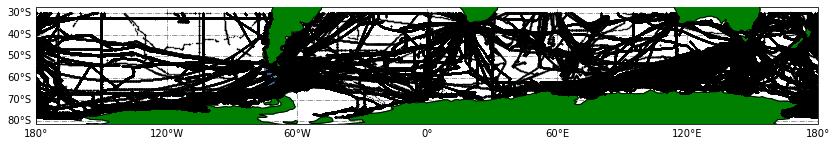

In [6]:
from GG_mthesis.d01_data.processing import rmap 
ax = rmap.plot_region()
ax.scatter(df['lon'], df['lat'], c='black', s=0.1,transform=ccrs.PlateCarree(), zorder=500)

In [7]:
df_sel = SOCAT.select_region(df)
df_sel = SOCAT.SA_CT_rho(df_sel)

c:\users\gian_\repos\mthesis_gianlucca\src\GG_mthesis\SOCAT_processing.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mm'][df['ss'] >= 60] = df['mm'][df['ss'] >= 60] + df['ss'][df['ss'] >= 60]/60
c:\users\gian_\repos\mthesis_gianlucca\src\GG_mthesis\SOCAT_processing.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ss'][df['ss'] >= 60] = df['ss'][df['ss'] >= 60] - 60
c:\users\gian_\repos\mthesis_gianlucca\src\GG_mthesis\SOCAT_processing.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/panda

C:\Users\gian_\miniconda3\envs\mthesis\lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
C:\Users\gian_\miniconda3\envs\mthesis\lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
c:\users\gian_\repos\mthesis_gianlucca\src\GG_mthesis\d01_data\processing.py:52: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_front_sel = df_fronts_sel.set_index(['front',df_fronts_sel.index]).drop('index',1)


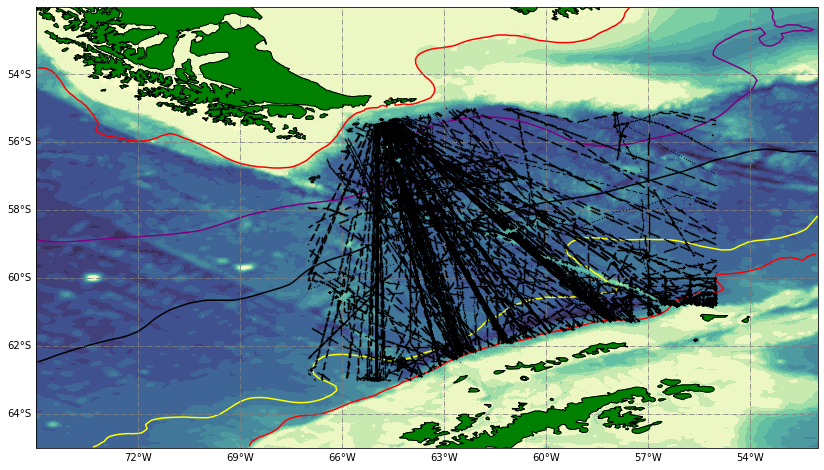

In [12]:
ax = rmap.plot_region()
ax.scatter(df_sel['lon'], df_sel['lat'], c='black', s=0.1,transform=ccrs.PlateCarree(), zorder=500)

In [9]:
#ds = df_sel.set_index('Expocode').to_xarray().set_coords(['longitude','latitude'])
#ds.where(ds['Expocode'] == '76XL20071224', drop=True)

In [10]:
#pd.MultiIndex.from_arrays([df_sel['datetime'], df_sel['Expocode']], names=['datetime', 'cruise'])

In [13]:
df_sel

,Expocode,QC_Flag,lon,lat,sample_depth [m],sal,T,Tequ [deg.C],WOA_SSS,ETOPO2_depth [m],dist_to_land [km],datetime,SA,CT,rho
0,069920201226,C,-65.69527,-55.48119,NaN,34.007,6.607,NaN,33.723,2513.0,62.0,2021-01-05 07:41:00,34.167727,6.612854,1026.690934
1,069920201226,C,-65.69037,-55.47937,NaN,34.012,6.604,NaN,33.723,2567.0,62.0,2021-01-05 07:42:00,34.172751,6.609784,1026.695273
2,069920201226,C,-65.68552,-55.47758,NaN,34.010,6.603,NaN,33.723,2620.0,62.0,2021-01-05 07:43:00,34.170741,6.608811,1026.693829
3,069920201226,C,-65.68065,-55.47582,NaN,34.014,6.601,NaN,33.723,2653.0,62.0,2021-01-05 07:44:00,34.174760,6.606755,1026.697247
4,069920201226,C,-65.67589,-55.47419,NaN,34.014,6.596,NaN,33.723,2670.0,62.0,2021-01-05 07:45:00,34.174760,6.601753,1026.697908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340024,76XL20071224,C,-57.54330,-61.09450,NaN,33.838,3.810,4.31,33.942,3143.0,130.0,2008-02-04 11:18:42,34.000870,3.816493,1026.884176
340025,76XL20071224,C,-57.53410,-61.10400,NaN,33.838,3.870,4.37,33.942,3056.0,129.0,2008-02-04 11:21:05,34.000878,3.876521,1026.878192
340026,76XL20071224,C,-57.52480,-61.11360,NaN,33.839,3.870,4.37,33.942,2969.0,129.0,2008-02-04 11:23:28,34.001891,3.876512,1026.878994
340027,76XL20071224,C,-57.51530,-61.12310,NaN,33.839,3.870,4.37,33.942,2944.0,128.0,2008-02-04 11:26:12,34.001898,3.876511,1026.879000


In [11]:
#SOCAT.save_cruises_to_disc(df_sel)

In [25]:
df_sel

,Expocode,QC_Flag,lon,lat,sample_depth [m],sal,T,Tequ [deg.C],WOA_SSS,ETOPO2_depth [m],dist_to_land [km],datetime,SA,CT,rho
0,069920201226,C,-65.69527,-55.48119,NaN,34.007,6.607,NaN,33.723,2513.0,62.0,2021-01-05 07:41:00,34.167727,6.612854,1026.690934
1,069920201226,C,-65.69037,-55.47937,NaN,34.012,6.604,NaN,33.723,2567.0,62.0,2021-01-05 07:42:00,34.172751,6.609784,1026.695273
2,069920201226,C,-65.68552,-55.47758,NaN,34.010,6.603,NaN,33.723,2620.0,62.0,2021-01-05 07:43:00,34.170741,6.608811,1026.693829
3,069920201226,C,-65.68065,-55.47582,NaN,34.014,6.601,NaN,33.723,2653.0,62.0,2021-01-05 07:44:00,34.174760,6.606755,1026.697247
4,069920201226,C,-65.67589,-55.47419,NaN,34.014,6.596,NaN,33.723,2670.0,62.0,2021-01-05 07:45:00,34.174760,6.601753,1026.697908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340024,76XL20071224,C,-57.54330,-61.09450,NaN,33.838,3.810,4.31,33.942,3143.0,130.0,2008-02-04 11:18:42,34.000870,3.816493,1026.884176
340025,76XL20071224,C,-57.53410,-61.10400,NaN,33.838,3.870,4.37,33.942,3056.0,129.0,2008-02-04 11:21:05,34.000878,3.876521,1026.878192
340026,76XL20071224,C,-57.52480,-61.11360,NaN,33.839,3.870,4.37,33.942,2969.0,129.0,2008-02-04 11:23:28,34.001891,3.876512,1026.878994
340027,76XL20071224,C,-57.51530,-61.12310,NaN,33.839,3.870,4.37,33.942,2944.0,128.0,2008-02-04 11:26:12,34.001898,3.876511,1026.879000


C:\Users\gian_\miniconda3\envs\mthesis\lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
C:\Users\gian_\miniconda3\envs\mthesis\lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
c:\users\gian_\repos\mthesis_gianlucca\src\GG_mthesis\d01_data\processing.py:52: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_front_sel = df_fronts_sel.set_index(['front',df_fronts_sel.index]).drop('index',1)
C:\Users\gian_\AppData\Local\Temp/ipykernel_18124/2022899925.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_xticklabels(

[Text(9e+17, 0, '04:00:00 PM 09 Jul'),
 Text(1e+18, 0, '01:46:40 AM 09 Sep'),
 Text(1.1e+18, 0, '11:33:20 AM 09 Nov'),
 Text(1.2e+18, 0, '09:20:00 PM 10 Jan'),
 Text(1.3e+18, 0, '07:06:40 AM 13 Mar'),
 Text(1.4e+18, 0, '04:53:20 PM 13 May'),
 Text(1.5e+18, 0, '02:40:00 AM 14 Jul'),
 Text(1.6e+18, 0, '12:26:40 PM 13 Sep'),
 Text(1.7e+18, 0, '10:13:20 PM 14 Nov')]

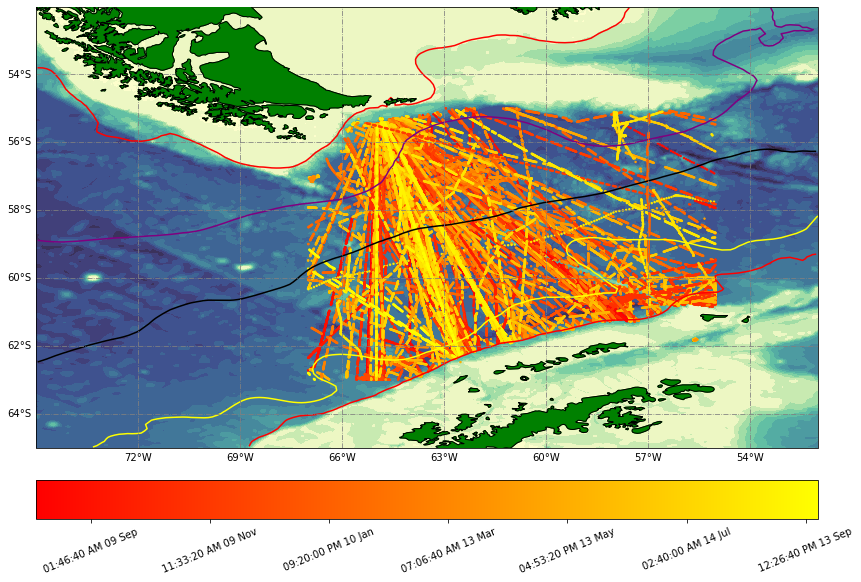

In [27]:
from GG_mthesis.d01_data.processing import rmap 
ax = rmap.plot_region()
scat = ax.scatter(df_sel['lon'], df_sel['lat'], c=df_sel['datetime'], cmap='autumn', s=2)
cbar = plt.colorbar(scat, location='bottom', pad=0.05, ax=ax)
cbar.ax.set_xticklabels(pd.to_datetime(cbar.get_ticks()).strftime(date_format='%r %d %b'), rotation=22.5)

C:\Users\gian_\miniconda3\envs\mthesis\lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
C:\Users\gian_\miniconda3\envs\mthesis\lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
c:\users\gian_\repos\mthesis_gianlucca\src\GG_mthesis\d01_data\processing.py:52: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_front_sel = df_fronts_sel.set_index(['front',df_fronts_sel.index]).drop('index',1)
C:\Users\gian_\AppData\Local\Temp/ipykernel_18124/3802312994.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_xticklabels

KeyboardInterrupt: 

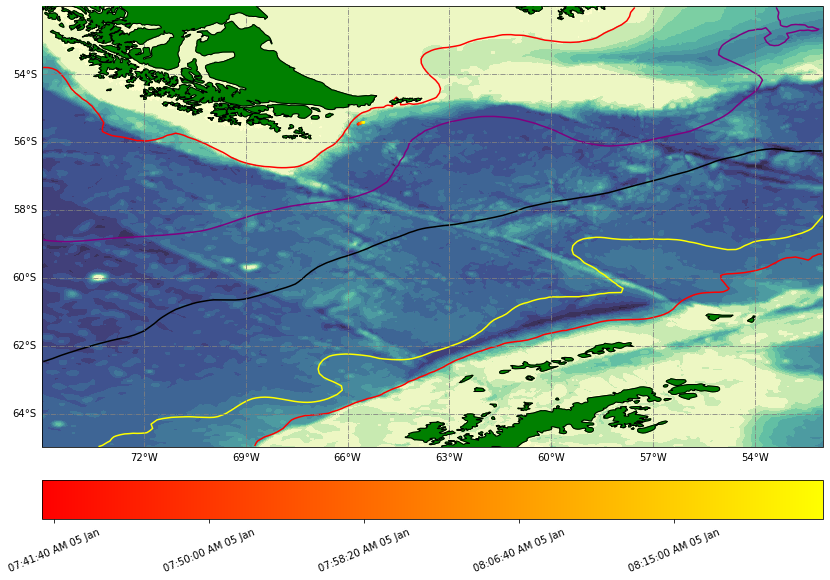

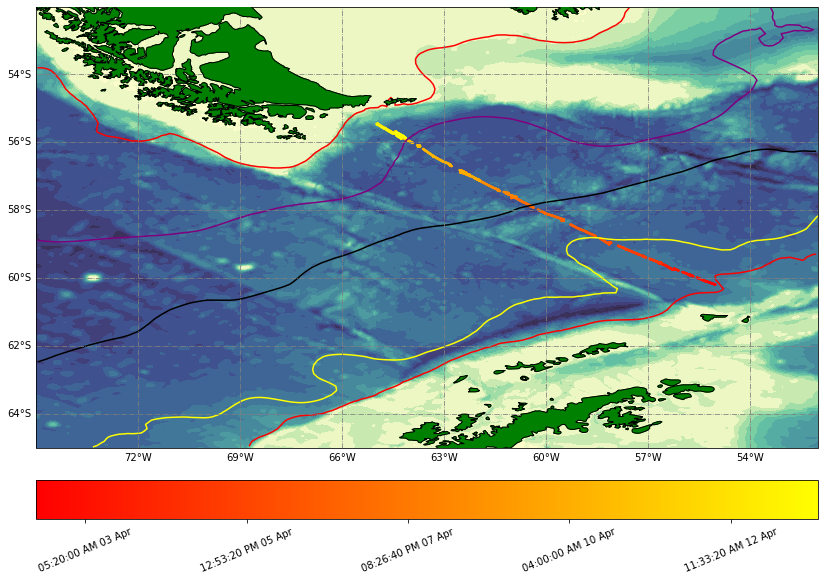

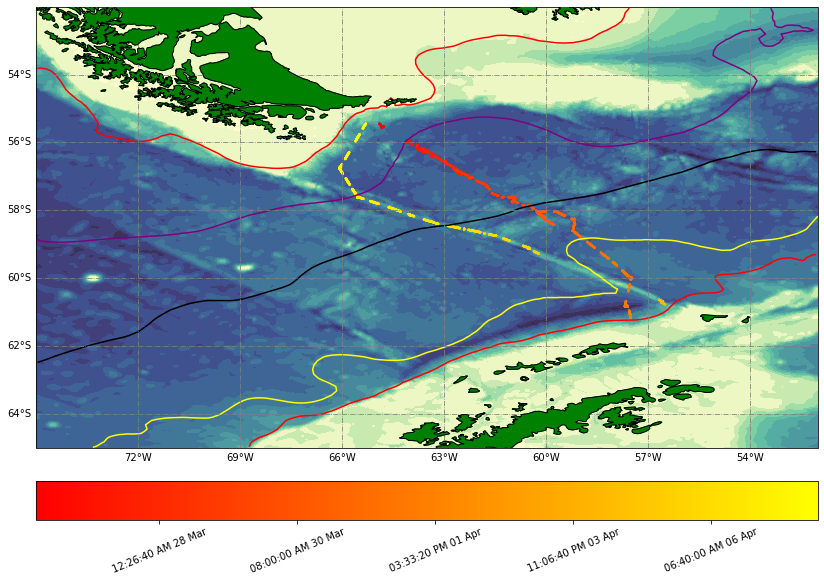

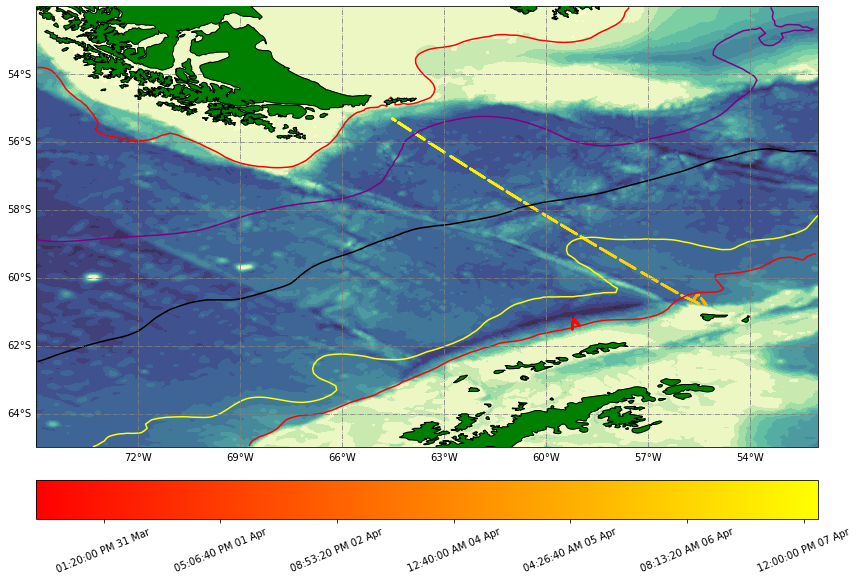

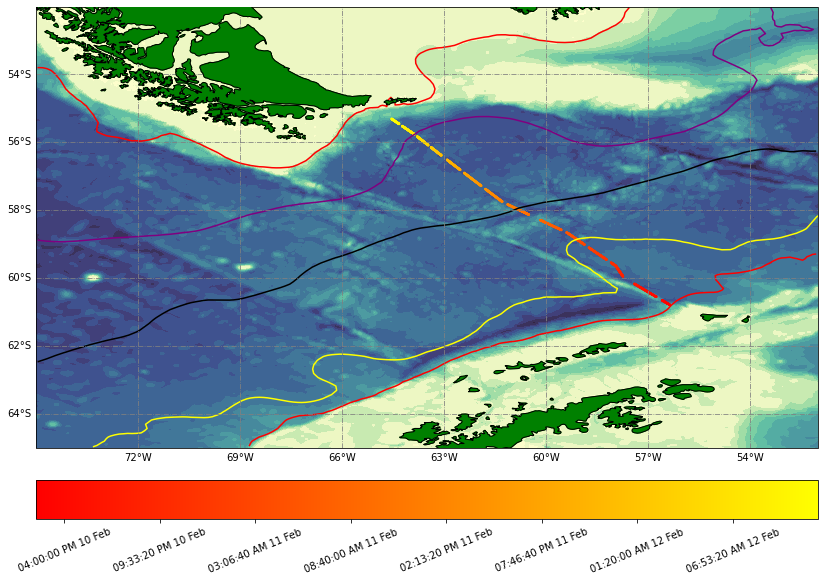

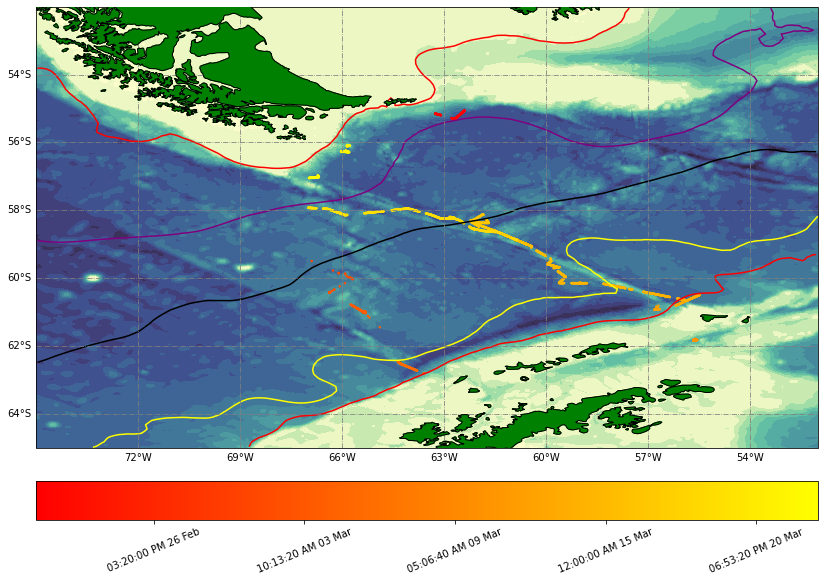

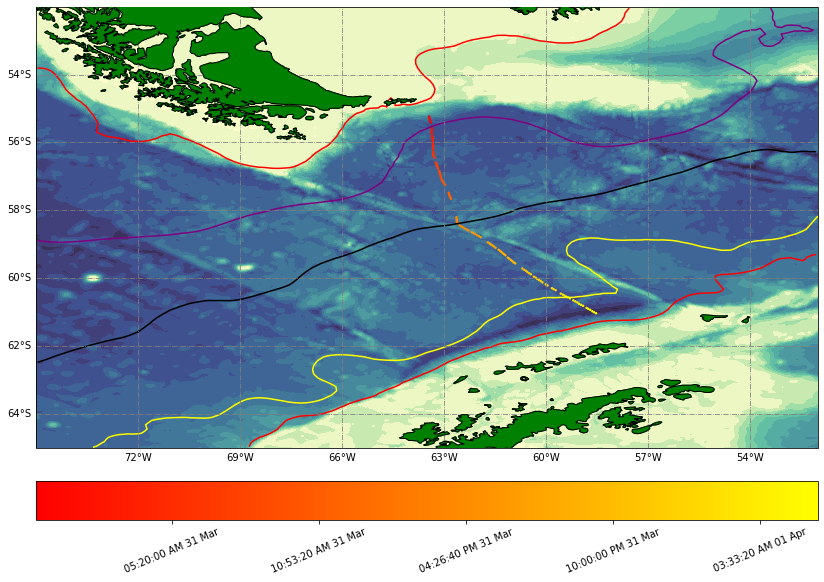

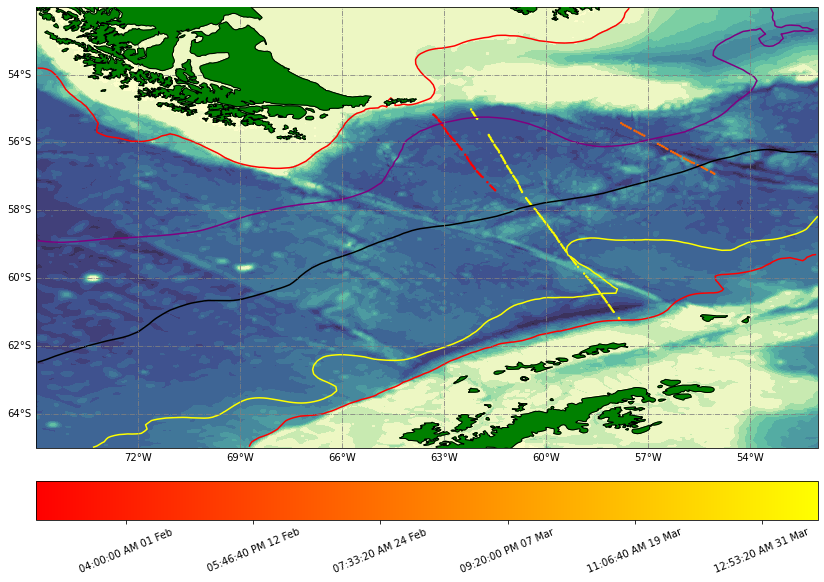

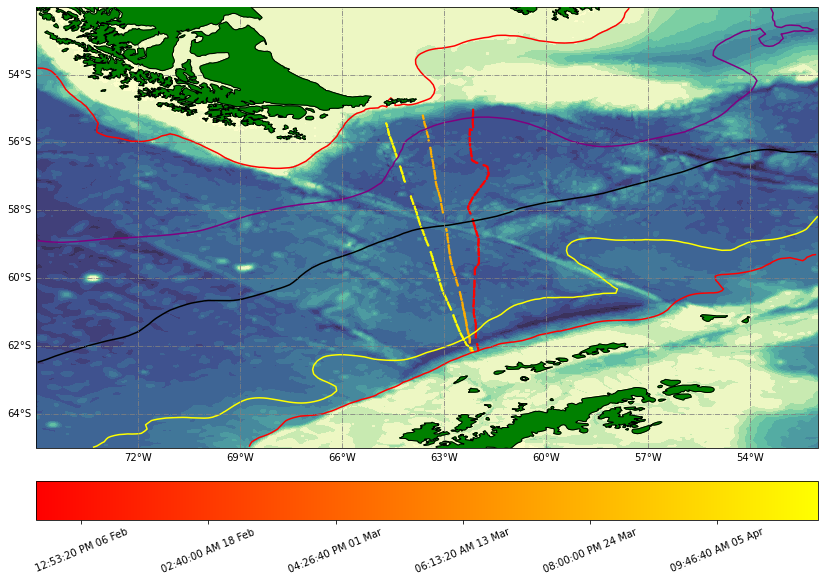

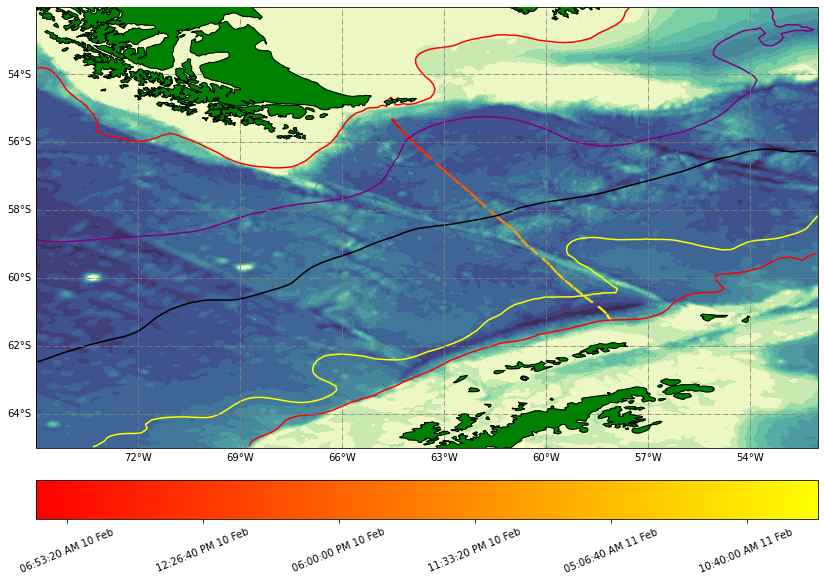

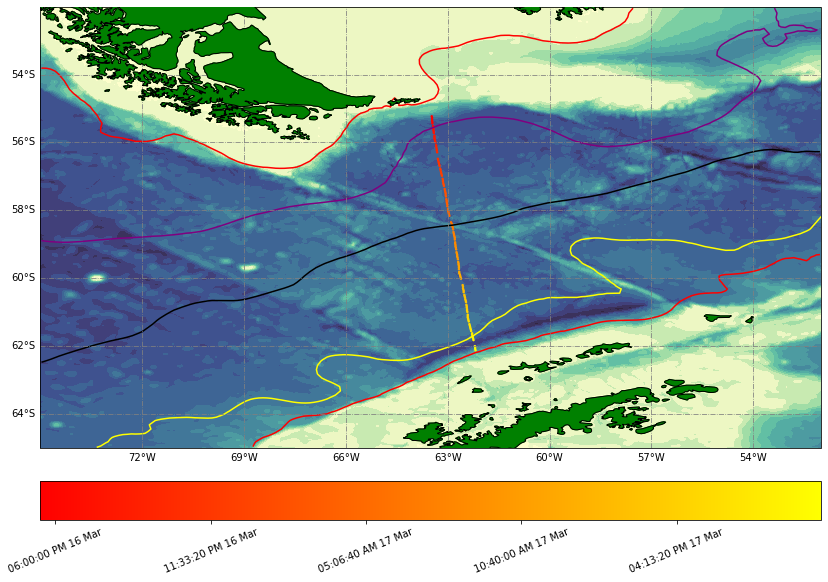

Error in callback <function flush_figures at 0x00000251AED4C0D0> (for post_execute):


KeyboardInterrupt: 

In [29]:
from GG_mthesis.d01_data.processing import rmap 
import os
cruise_id = df_sel['Expocode'].unique()
for i in range(len(cruise_id)):    
    path = os.path.abspath('results/SOCAT')
    filename = path + '/' + str(cruise_id[i]) + '.png'
    if os.path.isfile(filename) == False:
        df_aux = df_sel[df_sel['Expocode'] == cruise_id[i]]
        ax = rmap.plot_region()
        scat = ax.scatter(df_aux['lon'], df_aux['lat'], c=df_aux['datetime'], cmap='autumn', s=2)
        cbar = plt.colorbar(scat, location='bottom', pad=0.05, ax=ax)
        cbar.ax.set_xticklabels(pd.to_datetime(cbar.get_ticks()).strftime(date_format='%r %d %b'), rotation=22.5)
        plt.savefig(filename, format='png')
    else:
        continue